# Feature Engineering

---

1. Import packages
2. Load data
3. Feature engineering

---

## 1. Import packages

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from datetime import datetime

In [57]:
pd.set_option('display.max_columns', None)

---
## 2. Load data

In [58]:
df = pd.read_csv('clean_data_after_eda.csv')
df["date_activ"] = pd.to_datetime(df["date_activ"], format='%Y-%m-%d')
df["date_end"] = pd.to_datetime(df["date_end"], format='%Y-%m-%d')
df["date_modif_prod"] = pd.to_datetime(df["date_modif_prod"], format='%Y-%m-%d')
df["date_renewal"] = pd.to_datetime(df["date_renewal"], format='%Y-%m-%d')

In [59]:
df = df.drop(columns = ['Unnamed: 0'])

In [60]:
df.head(3)

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   

   cons_12m  cons_gas_12m  cons_last_month date_activ   date_end  \
0         0         54946                0 2013-06-15 2016-06-15   
1      4660             0                0 2009-08-21 2016-08-30   
2       544             0                0 2010-04-16 2016-04-16   

  date_modif_prod date_renewal  forecast_cons_12m  forecast_cons_year  \
0      2015-11-01   2015-06-23               0.00                   0   
1      2009-08-21   2015-08-31             189.95                   0   
2      2010-04-16   2015-04-17              47.96                   0   

   forecast_discount_energy  forecast_meter_rent_12m  \
0                       0.0                     1.78   
1                       0.0                    16.27   
2                       0.0                    38.72   

   forecast_price_energy_off_peak  forecast_price_energy_peak  \
0                        0.114481                    0.098142   
1                        0.145711                    0.000000   
2                        0.165794                    0.087899   

   forecast_price_pow_off_peak has_gas  imp_cons  margin_gross_pow_ele  \
0                    40.606701       t       0.0                 25.44   
1                    44.311378       f       0.0                 16.38   
2                    44.311378       f       0.0                 28.60   

   margin_net_pow_ele  nb_prod_act  net_margin  num_years_antig  \
0               25.44            2      678.99                3   
1               16.38            1       18.89                6   
2               28.60            1        6.60                6   

                          origin_up  pow_max  mean_year_price_p1_var  \
0  lxidpiddsbxsbosboudacockeimpuepw   43.648                0.124787   
1  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.800                0.149609   
2  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.856                0.170512   

   mean_year_price_p2_var  mean_year_price_p3_var  mean_year_price_p1_fix  \
0                0.100749                 0.06653               40.942265   
1                0.007124                 0.00000               44.311375   
2                0.088421                 0.00000               44.385450   

   mean_year_price_p2_fix  mean_year_price_p3_fix  mean_year_price_p1  \
0                22.35201                14.90134           41.067053   
1                 0.00000                 0.00000           44.460984   
2                 0.00000                 0.00000           44.555962   

   mean_year_price_p2  mean_year_price_p3  mean_6m_price_p1_var  \
0           22.452760           14.967871              0.123598   
1            0.007124            0.000000              0.147851   
2            0.088421            0.000000              0.168569   

   mean_6m_price_p2_var  mean_6m_price_p3_var  mean_6m_price_p1_fix  \
0              0.098104              0.061525             41.318559   
1              0.014247              0.000000             44.355820   
2              0.088535              0.000000             44.444710   

   mean_6m_price_p2_fix  mean_6m_price_p3_fix  mean_6m_price_p1  \
0             20.364442             13.576296         41.442157   
1              0.000000              0.000000         44.503671   
2              0.000000              0.000000         44.613279   

   mean_6m_price_p2  mean_6m_price_p3  mean_3m_price_p1_var  \
0         20.462545         13.637821              0.131756   
1          0.014247          0.000000              0.147600   
2          0.088535          0.000000              0.167798   

   mean_3m_price_p2_var  mean_3m_price_p3_var  mean_3m_price_p1_fix  \
0              0.092638              0.036909             42.497907   
1            

---

## 3. Feature engineering

### Difference between off-peak prices in December and preceding January


In [61]:
price_df = pd.read_csv('price_data.csv')
price_df["price_date"] = pd.to_datetime(price_df["price_date"], format='%Y-%m-%d')
price_df.head()

id price_date  price_off_peak_var  \
0  038af19179925da21a25619c5a24b745 2015-01-01            0.151367   
1  038af19179925da21a25619c5a24b745 2015-02-01            0.151367   
2  038af19179925da21a25619c5a24b745 2015-03-01            0.151367   
3  038af19179925da21a25619c5a24b745 2015-04-01            0.149626   
4  038af19179925da21a25619c5a24b745 2015-05-01            0.149626   

   price_peak_var  price_mid_peak_var  price_off_peak_fix  price_peak_fix  \
0             0.0                 0.0           44.266931             0.0   
1             0.0                 0.0           44.266931             0.0   
2             0.0                 0.0           44.266931             0.0   
3             0.0                 0.0           44.266931             0.0   
4             0.0                 0.0           44.266931             0.0   

   price_mid_peak_fix  
0                 0.0  
1                 0.0  
2                 0.0  
3                 0.0  
4                 0.0

In [62]:
# Group off-peak prices by companies and month
monthly_price_by_id = price_df.groupby(['id', 'price_date']).agg({'price_off_peak_var': 'mean', 'price_off_peak_fix': 'mean'}).reset_index()

# Get january and december prices
jan_prices = monthly_price_by_id.groupby('id').first().reset_index()
dec_prices = monthly_price_by_id.groupby('id').last().reset_index()

# Calculate the difference
diff = pd.merge(dec_prices.rename(columns={'price_off_peak_var': 'dec_1', 'price_off_peak_fix': 'dec_2'}), jan_prices.drop(columns='price_date'), on='id')
diff['offpeak_diff_dec_january_energy'] = diff['dec_1'] - diff['price_off_peak_var']
diff['offpeak_diff_dec_january_power'] = diff['dec_2'] - diff['price_off_peak_fix']
diff = diff[['id', 'offpeak_diff_dec_january_energy','offpeak_diff_dec_january_power']]
diff.head()

id  offpeak_diff_dec_january_energy  \
0  0002203ffbb812588b632b9e628cc38d                        -0.006192   
1  0004351ebdd665e6ee664792efc4fd13                        -0.004104   
2  0010bcc39e42b3c2131ed2ce55246e3c                         0.050443   
3  0010ee3855fdea87602a5b7aba8e42de                        -0.010018   
4  00114d74e963e47177db89bc70108537                        -0.003994   

   offpeak_diff_dec_january_power  
0                        0.162916  
1                        0.177779  
2                        1.500000  
3                        0.162916  
4                       -0.000001

In [63]:
diff_churn = pd.merge(diff, df[['id', 'churn']], on = 'id')
diff_churn.head()

id  offpeak_diff_dec_january_energy  \
0  0002203ffbb812588b632b9e628cc38d                        -0.006192   
1  0004351ebdd665e6ee664792efc4fd13                        -0.004104   
2  0010bcc39e42b3c2131ed2ce55246e3c                         0.050443   
3  00114d74e963e47177db89bc70108537                        -0.003994   
4  0013f326a839a2f6ad87a1859952d227                        -0.006171   

   offpeak_diff_dec_january_power  churn  
0                        0.162916      0  
1                        0.177779      0  
2                        1.500000      0  
3                       -0.000001      0  
4                        0.000000      0

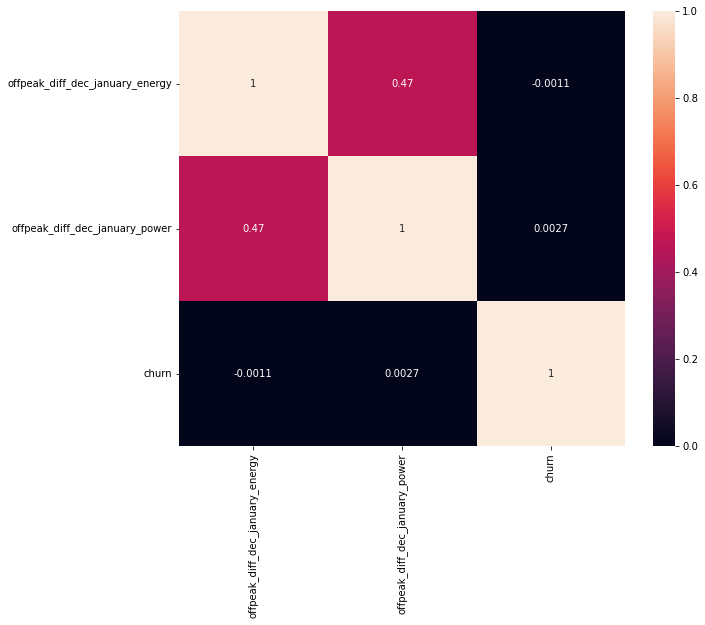

In [64]:
corr = diff_churn.corr()
# Plot correlation
plt.figure(figsize=(10,8))
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot = True, annot_kws={'size':10})
# Axis ticks size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

### Average price changes across periods

In [65]:
price_df.head(3)

id price_date  price_off_peak_var  \
0  038af19179925da21a25619c5a24b745 2015-01-01            0.151367   
1  038af19179925da21a25619c5a24b745 2015-02-01            0.151367   
2  038af19179925da21a25619c5a24b745 2015-03-01            0.151367   

   price_peak_var  price_mid_peak_var  price_off_peak_fix  price_peak_fix  \
0             0.0                 0.0           44.266931             0.0   
1             0.0                 0.0           44.266931             0.0   
2             0.0                 0.0           44.266931             0.0   

   price_mid_peak_fix  
0                 0.0  
1                 0.0  
2                 0.0

In [66]:
mean_price = price_df.groupby('id').mean().reset_index()
mean_price.head()

id  price_off_peak_var  price_peak_var  \
0  0002203ffbb812588b632b9e628cc38d            0.124338        0.103794   
1  0004351ebdd665e6ee664792efc4fd13            0.146426        0.000000   
2  0010bcc39e42b3c2131ed2ce55246e3c            0.181558        0.000000   
3  0010ee3855fdea87602a5b7aba8e42de            0.118757        0.098292   
4  00114d74e963e47177db89bc70108537            0.147926        0.000000   

   price_mid_peak_var  price_off_peak_fix  price_peak_fix  price_mid_peak_fix  
0            0.073160           40.701732       24.421038           16.280694  
1            0.000000           44.385450        0.000000            0.000000  
2            0.000000           45.319710        0.000000            0.000000  
3            0.069032           40.647427       24.388455           16.258971  
4            0.000000           44.266930        0.000000            0.000000

In [67]:
mean_price = mean_price.rename(
    index=str, 
    columns={
        "price_off_peak_var": "mean_price_p1_var",
        "price_peak_var": "mean_price_p2_var",
        "price_mid_peak_var": "mean_price_p3_var",
        "price_off_peak_fix": "mean_price_p1_fix",
        "price_peak_fix": "mean_price_p2_fix",
        "price_mid_peak_fix": "mean_price_p3_fix"
    }
)

mean_price['p1_p2_diff_var'] = mean_price['mean_price_p1_var'] - mean_price['mean_price_p2_var']
mean_price['p2_p3_diff_var'] = mean_price['mean_price_p2_var'] - mean_price['mean_price_p3_var']
mean_price['p1_p3_diff_var'] = mean_price['mean_price_p1_var'] - mean_price['mean_price_p3_var']

mean_price['p1_p2_diff_fix'] = mean_price['mean_price_p1_fix'] - mean_price['mean_price_p2_fix']
mean_price['p2_p3_diff_fix'] = mean_price['mean_price_p2_fix'] - mean_price['mean_price_p3_fix']
mean_price['p1_p3_diff_fix'] = mean_price['mean_price_p1_fix'] - mean_price['mean_price_p3_fix']

mean_price.head()

id  mean_price_p1_var  mean_price_p2_var  \
0  0002203ffbb812588b632b9e628cc38d           0.124338           0.103794   
1  0004351ebdd665e6ee664792efc4fd13           0.146426           0.000000   
2  0010bcc39e42b3c2131ed2ce55246e3c           0.181558           0.000000   
3  0010ee3855fdea87602a5b7aba8e42de           0.118757           0.098292   
4  00114d74e963e47177db89bc70108537           0.147926           0.000000   

   mean_price_p3_var  mean_price_p1_fix  mean_price_p2_fix  mean_price_p3_fix  \
0           0.073160          40.701732          24.421038          16.280694   
1           0.000000          44.385450           0.000000           0.000000   
2           0.000000          45.319710           0.000000           0.000000   
3           0.069032          40.647427          24.388455          16.258971   
4           0.000000          44.266930           0.000000           0.000000   

   p1_p2_diff_var  p2_p3_diff_var  p1_p3_diff_var  p1_p2_diff_fix  \
0        0.020545        0.030633        0.051178       16.280694   
1        0.146426        0.000000        0.146426       44.385450   
2        0.181558        0.000000        0.181558       45.319710   
3        0.020465        0.029260        0.049725       16.258972   
4        0.147926        0.000000        0.147926       44.266930   

   p2_p3_diff_fix  p1_p3_diff_fix  
0        8.140345       24.421038  
1        0.000000       44.385450  
2        0.000000       45.319710  
3        8.129484       24.388456  
4        0.000000       44.266930

In [68]:
df = pd.merge(df, mean_price[['id', 
                               'p1_p2_diff_var', 
                               'p1_p2_diff_fix', 
                               'p2_p3_diff_var', 
                               'p2_p3_diff_fix', 
                               'p1_p3_diff_var', 
                              'p1_p3_diff_fix']], on = 'id')
                              
                              
df.head()

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4  149d57cf92fc41cf94415803a877cb4b                           MISSING   

   cons_12m  cons_gas_12m  cons_last_month date_activ   date_end  \
0         0         54946                0 2013-06-15 2016-06-15   
1      4660             0                0 2009-08-21 2016-08-30   
2       544             0                0 2010-04-16 2016-04-16   
3      1584             0                0 2010-03-30 2016-03-30   
4      4425             0              526 2010-01-13 2016-03-07   

  date_modif_prod date_renewal  forecast_cons_12m  forecast_cons_year  \
0      2015-11-01   2015-06-23               0.00                   0   
1      2009-08-21   2015-08-31             189.95                   0   
2      2010-04-16   2015-04-17              47.96                   0   
3      2010-03-30   2015-03-31             240.04                   0   
4      2010-01-13   2015-03-09             445.75                 526   

   forecast_discount_energy  forecast_meter_rent_12m  \
0                       0.0                     1.78   
1                       0.0                    16.27   
2                       0.0                    38.72   
3                       0.0                    19.83   
4                       0.0                   131.73   

   forecast_price_energy_off_peak  forecast_price_energy_peak  \
0                        0.114481                    0.098142   
1                        0.145711                    0.000000   
2                        0.165794                    0.087899   
3                        0.146694                    0.000000   
4                        0.116900                    0.100015   

   forecast_price_pow_off_peak has_gas  imp_cons  margin_gross_pow_ele  \
0                    40.606701       t      0.00                 25.44   
1                    44.311378       f      0.00                 16.38   
2                    44.311378       f      0.00                 28.60   
3                    44.311378       f      0.00                 30.22   
4                    40.606701       f     52.32                 44.91   

   margin_net_pow_ele  nb_prod_act  net_margin  num_years_antig  \
0               25.44            2      678.99                3   
1               16.38            1       18.89                6   
2               28.60            1        6.60                6   
3               30.22            1       25.46                6   
4               44.91            1       47.98                6   

                          origin_up  pow_max  mean_year_price_p1_var  \
0  lxidpiddsbxsbosboudacockeimpuepw   43.648                0.124787   
1  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.800                0.149609   
2  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.856                0.170512   
3  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.200                0.151210   
4  kamkkxfxxuwbdslkwifmmcsiusiuosws   19.800                0.124174   

   mean_year_price_p2_var  mean_year_price_p3_var  mean_year_price_p1_fix  \
0                0.100749                0.066530               40.942265   
1                0.007124                0.000000               44.311375   
2                0.088421                0.000000               44.385450   
3                0.000000                0.000000               44.400265   
4                0.103638                0.072865               40.688156   

   mean_year_price_p2_fix  mean_year_price_p3_fix  mean_year_price_p1  \
0               22.352010               14.901340           41.067053   
1                0.000000                0.000000           44.460984   
2                0.000000                0.000000      

This feature may be useful because it adds more granularity to the existing feature. 

The dec-jan feature may reveal macro patterns that occur over an entire year, whereas inter-time-period features may reveal patterns on a micro scale between months.

### Max price changes across periods and months

In [69]:
price_df.head()

id price_date  price_off_peak_var  \
0  038af19179925da21a25619c5a24b745 2015-01-01            0.151367   
1  038af19179925da21a25619c5a24b745 2015-02-01            0.151367   
2  038af19179925da21a25619c5a24b745 2015-03-01            0.151367   
3  038af19179925da21a25619c5a24b745 2015-04-01            0.149626   
4  038af19179925da21a25619c5a24b745 2015-05-01            0.149626   

   price_peak_var  price_mid_peak_var  price_off_peak_fix  price_peak_fix  \
0             0.0                 0.0           44.266931             0.0   
1             0.0                 0.0           44.266931             0.0   
2             0.0                 0.0           44.266931             0.0   
3             0.0                 0.0           44.266931             0.0   
4             0.0                 0.0           44.266931             0.0   

   price_mid_peak_fix  
0                 0.0  
1                 0.0  
2                 0.0  
3                 0.0  
4                 0.0

In [70]:
avg_month = price_df

avg_month['p1p2_monthlydiff_var'] = avg_month['price_off_peak_var'] - avg_month['price_peak_var']
avg_month['p2p3_monthlydiff_var'] = avg_month['price_peak_var'] - avg_month['price_mid_peak_var']
avg_month['p1p3_monthlydiff_var'] = avg_month['price_off_peak_var'] - avg_month['price_mid_peak_var']

avg_month['p1p2_monthlydiff_fix'] = avg_month['price_off_peak_fix'] - avg_month['price_peak_fix']
avg_month['p2p3_monthlydiff_fix'] = avg_month['price_peak_fix'] - avg_month['price_mid_peak_fix']
avg_month['p1p3_monthlydiff_fix'] = avg_month['price_off_peak_fix'] - avg_month['price_mid_peak_fix']

avg_month = avg_month[['id','price_date','p1p2_monthlydiff_var', 
                                       'p2p3_monthlydiff_var', 
                                       'p1p3_monthlydiff_var', 
                                       'p1p2_monthlydiff_fix', 
                                       'p2p3_monthlydiff_fix', 
                                       'p1p3_monthlydiff_fix']]
avg_month.head()

id price_date  p1p2_monthlydiff_var  \
0  038af19179925da21a25619c5a24b745 2015-01-01              0.151367   
1  038af19179925da21a25619c5a24b745 2015-02-01              0.151367   
2  038af19179925da21a25619c5a24b745 2015-03-01              0.151367   
3  038af19179925da21a25619c5a24b745 2015-04-01              0.149626   
4  038af19179925da21a25619c5a24b745 2015-05-01              0.149626   

   p2p3_monthlydiff_var  p1p3_monthlydiff_var  p1p2_monthlydiff_fix  \
0                   0.0              0.151367             44.266931   
1                   0.0              0.151367             44.266931   
2                   0.0              0.151367             44.266931   
3                   0.0              0.149626             44.266931   
4                   0.0              0.149626             44.266931   

   p2p3_monthlydiff_fix  p1p3_monthlydiff_fix  
0                   0.0             44.266931  
1                   0.0             44.266931  
2                   0.0             44.266931  
3                   0.0             44.266931  
4                   0.0             44.266931

In [71]:
# Calculate the maximum monthly difference across time periods
max_month_dff = avg_month.groupby(['id']).max().reset_index()
max_month_dff = max_month_dff.drop(columns = ['price_date'])

max_month_dff = max_month_dff.rename(columns = {
     'p1p2_monthlydiff_var': 'p1p2_maxmonthlydiff_var',
    'p2p3_monthlydiff_var': 'p2p3_maxmonthlydiff_var',
    'p1p3_monthlydiff_var': 'p1p3_maxmonthlydiff_var',
    'p1p2_monthlydiff_fix': 'p1p2_maxmonthlydiff_fix',
    'p2p3_monthlydiff_fix': 'p2p3_maxmonthlydiff_fix',
    'p1p3_monthlydiff_fix': 'p1p3_maxmonthlydiff_fix'
})

max_month_dff.head()

id  p1p2_maxmonthlydiff_var  \
0  0002203ffbb812588b632b9e628cc38d                 0.022225   
1  0004351ebdd665e6ee664792efc4fd13                 0.148405   
2  0010bcc39e42b3c2131ed2ce55246e3c                 0.205742   
3  0010ee3855fdea87602a5b7aba8e42de                 0.022581   
4  00114d74e963e47177db89bc70108537                 0.149902   

   p2p3_maxmonthlydiff_var  p1p3_maxmonthlydiff_var  p1p2_maxmonthlydiff_fix  \
0                 0.033743                 0.055866                16.291555   
1                 0.000000                 0.148405                44.444710   
2                 0.000000                 0.205742                45.944710   
3                 0.031859                 0.054440                16.291555   
4                 0.000000                 0.149902                44.266931   

   p2p3_maxmonthlydiff_fix  p1p3_maxmonthlydiff_fix  
0                 8.145775                24.437330  
1                 0.000000                44.444710  
2                 0.000000                45.944710  
3                 8.145775                24.437330  
4                 0.000000                44.266931

In [72]:
df = pd.merge(df, max_month_dff, on = 'id')
df.head()

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4  149d57cf92fc41cf94415803a877cb4b                           MISSING   

   cons_12m  cons_gas_12m  cons_last_month date_activ   date_end  \
0         0         54946                0 2013-06-15 2016-06-15   
1      4660             0                0 2009-08-21 2016-08-30   
2       544             0                0 2010-04-16 2016-04-16   
3      1584             0                0 2010-03-30 2016-03-30   
4      4425             0              526 2010-01-13 2016-03-07   

  date_modif_prod date_renewal  forecast_cons_12m  forecast_cons_year  \
0      2015-11-01   2015-06-23               0.00                   0   
1      2009-08-21   2015-08-31             189.95                   0   
2      2010-04-16   2015-04-17              47.96                   0   
3      2010-03-30   2015-03-31             240.04                   0   
4      2010-01-13   2015-03-09             445.75                 526   

   forecast_discount_energy  forecast_meter_rent_12m  \
0                       0.0                     1.78   
1                       0.0                    16.27   
2                       0.0                    38.72   
3                       0.0                    19.83   
4                       0.0                   131.73   

   forecast_price_energy_off_peak  forecast_price_energy_peak  \
0                        0.114481                    0.098142   
1                        0.145711                    0.000000   
2                        0.165794                    0.087899   
3                        0.146694                    0.000000   
4                        0.116900                    0.100015   

   forecast_price_pow_off_peak has_gas  imp_cons  margin_gross_pow_ele  \
0                    40.606701       t      0.00                 25.44   
1                    44.311378       f      0.00                 16.38   
2                    44.311378       f      0.00                 28.60   
3                    44.311378       f      0.00                 30.22   
4                    40.606701       f     52.32                 44.91   

   margin_net_pow_ele  nb_prod_act  net_margin  num_years_antig  \
0               25.44            2      678.99                3   
1               16.38            1       18.89                6   
2               28.60            1        6.60                6   
3               30.22            1       25.46                6   
4               44.91            1       47.98                6   

                          origin_up  pow_max  mean_year_price_p1_var  \
0  lxidpiddsbxsbosboudacockeimpuepw   43.648                0.124787   
1  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.800                0.149609   
2  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.856                0.170512   
3  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.200                0.151210   
4  kamkkxfxxuwbdslkwifmmcsiusiuosws   19.800                0.124174   

   mean_year_price_p2_var  mean_year_price_p3_var  mean_year_price_p1_fix  \
0                0.100749                0.066530               40.942265   
1                0.007124                0.000000               44.311375   
2                0.088421                0.000000               44.385450   
3                0.000000                0.000000               44.400265   
4                0.103638                0.072865               40.688156   

   mean_year_price_p2_fix  mean_year_price_p3_fix  mean_year_price_p1  \
0               22.352010               14.901340           41.067053   
1                0.000000                0.000000           44.460984   
2                0.000000                0.000000      

### Tenure

How long a company has been a client of PowerCo.

In [73]:
df['tenure'] = ((df['date_end'] - df['date_activ'])/ np.timedelta64(1, 'Y')).astype(int)
df.groupby(['tenure']).agg({'churn': 'mean'}).sort_values(by='churn', ascending=False)

churn
tenure          
3       0.143836
2       0.133080
4       0.125756
13      0.095238
5       0.085425
12      0.083333
6       0.080713
7       0.073394
11      0.063584
8       0.048000
9       0.024096
10      0.020000

We can see that companies who have only been a client for 4 or less months are much more likely to churn compared to companies that have been a client for longer. Interestingly, the difference between 4 and 5 months is about 4%, which represents a large jump in likelihood for a customer to churn compared to the other differences between ordered tenure values. Perhaps this reveals that getting a customer to over 4 months tenure is actually a large milestone with respect to keeping them as a long term customer.

This is an interesting feature to keep for modelling because clearly how long you've been a client, has a influence on the chance of a client churning.

### Transformation

In [74]:
df.head()

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4  149d57cf92fc41cf94415803a877cb4b                           MISSING   

   cons_12m  cons_gas_12m  cons_last_month date_activ   date_end  \
0         0         54946                0 2013-06-15 2016-06-15   
1      4660             0                0 2009-08-21 2016-08-30   
2       544             0                0 2010-04-16 2016-04-16   
3      1584             0                0 2010-03-30 2016-03-30   
4      4425             0              526 2010-01-13 2016-03-07   

  date_modif_prod date_renewal  forecast_cons_12m  forecast_cons_year  \
0      2015-11-01   2015-06-23               0.00                   0   
1      2009-08-21   2015-08-31             189.95                   0   
2      2010-04-16   2015-04-17              47.96                   0   
3      2010-03-30   2015-03-31             240.04                   0   
4      2010-01-13   2015-03-09             445.75                 526   

   forecast_discount_energy  forecast_meter_rent_12m  \
0                       0.0                     1.78   
1                       0.0                    16.27   
2                       0.0                    38.72   
3                       0.0                    19.83   
4                       0.0                   131.73   

   forecast_price_energy_off_peak  forecast_price_energy_peak  \
0                        0.114481                    0.098142   
1                        0.145711                    0.000000   
2                        0.165794                    0.087899   
3                        0.146694                    0.000000   
4                        0.116900                    0.100015   

   forecast_price_pow_off_peak has_gas  imp_cons  margin_gross_pow_ele  \
0                    40.606701       t      0.00                 25.44   
1                    44.311378       f      0.00                 16.38   
2                    44.311378       f      0.00                 28.60   
3                    44.311378       f      0.00                 30.22   
4                    40.606701       f     52.32                 44.91   

   margin_net_pow_ele  nb_prod_act  net_margin  num_years_antig  \
0               25.44            2      678.99                3   
1               16.38            1       18.89                6   
2               28.60            1        6.60                6   
3               30.22            1       25.46                6   
4               44.91            1       47.98                6   

                          origin_up  pow_max  mean_year_price_p1_var  \
0  lxidpiddsbxsbosboudacockeimpuepw   43.648                0.124787   
1  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.800                0.149609   
2  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.856                0.170512   
3  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.200                0.151210   
4  kamkkxfxxuwbdslkwifmmcsiusiuosws   19.800                0.124174   

   mean_year_price_p2_var  mean_year_price_p3_var  mean_year_price_p1_fix  \
0                0.100749                0.066530               40.942265   
1                0.007124                0.000000               44.311375   
2                0.088421                0.000000               44.385450   
3                0.000000                0.000000               44.400265   
4                0.103638                0.072865               40.688156   

   mean_year_price_p2_fix  mean_year_price_p3_fix  mean_year_price_p1  \
0               22.352010               14.901340           41.067053   
1                0.000000                0.000000           44.460984   
2                0.000000                0.000000      

#### Dates -> months

- months_activ = Number of months active until reference date (Jan 2016)
- months_to_end = Number of months of the contract left until reference date (Jan 2016)
- months_modif_prod = Number of months since last modification until reference date (Jan 2016)
- months_renewal = Number of months since last renewal until reference date (Jan 2016)

In [75]:
ref_date = datetime(2016, 1, 1)

def cal_month(df, column):
    diff = ref_date - df[column]
    months = (diff / np.timedelta64(1, 'M')).astype(int)
    return months

In [76]:
# Create columns
df['months_activ'] = cal_month(df, 'date_activ')
df['months_to_end'] = -cal_month(df, 'date_end')
df['months_modif_prod'] = cal_month(df, 'date_modif_prod')
df['months_renewal'] = cal_month(df, 'date_renewal')

In [77]:
df = df.drop(columns = ['date_activ', 'date_end', 'date_modif_prod', 'date_renewal'])

#### Boolean

In [78]:
df['has_gas'] = df['has_gas'].replace(['t', 'f'], [1, 0])
df.groupby(['has_gas']).agg({'churn': 'mean'})

churn
has_gas          
0        0.100544
1        0.081887

If a customer also buys gas from PowerCo, it shows that they have multiple products and are a loyal customer to the brand. Hence, it is no surprise that customers who do not buy gas are almost 2% more likely to churn than customers who also buy gas from PowerCo. Hence, this is a useful feature.



#### Channel_sale

In [79]:
# Transform into categorical type
df['channel_sales'] = df['channel_sales'].astype('category')

# Let's see how many categories are within this column
df['channel_sales'].value_counts()

foosdfpfkusacimwkcsosbicdxkicaua    6753
MISSING                             3725
lmkebamcaaclubfxadlmueccxoimlema    1843
usilxuppasemubllopkaafesmlibmsdf    1375
ewpakwlliwisiwduibdlfmalxowmwpci     893
sddiedcslfslkckwlfkdpoeeailfpeds      11
epumfxlbckeskwekxbiuasklxalciiuu       3
fixdbufsefwooaasfcxdxadsiekoceaa       2
Name: channel_sales, dtype: int64

We have 8 categories, so we will create 8 dummy variables from this column. However, as you can see the last 3 categories in the output above, show that they only have 11, 3 and 2 occurrences respectively. Considering that our dataset has about 14000 rows, this means that these dummy variables will be almost entirely 0 and so will not add much predictive power to the model at all (since they're almost entirely a constant value and provide very little).

For this reason, we will drop these 3 dummy variables.

In [80]:
df = pd.get_dummies(df, columns=['channel_sales'], prefix='channel')
df = df.drop(columns=['channel_sddiedcslfslkckwlfkdpoeeailfpeds', 'channel_epumfxlbckeskwekxbiuasklxalciiuu', 'channel_fixdbufsefwooaasfcxdxadsiekoceaa'])
df.head()

id  cons_12m  cons_gas_12m  cons_last_month  \
0  24011ae4ebbe3035111d65fa7c15bc57         0         54946                0   
1  d29c2c54acc38ff3c0614d0a653813dd      4660             0                0   
2  764c75f661154dac3a6c254cd082ea7d       544             0                0   
3  bba03439a292a1e166f80264c16191cb      1584             0                0   
4  149d57cf92fc41cf94415803a877cb4b      4425             0              526   

   forecast_cons_12m  forecast_cons_year  forecast_discount_energy  \
0               0.00                   0                       0.0   
1             189.95                   0                       0.0   
2              47.96                   0                       0.0   
3             240.04                   0                       0.0   
4             445.75                 526                       0.0   

   forecast_meter_rent_12m  forecast_price_energy_off_peak  \
0                     1.78                        0.114481   
1                    16.27                        0.145711   
2                    38.72                        0.165794   
3                    19.83                        0.146694   
4                   131.73                        0.116900   

   forecast_price_energy_peak  forecast_price_pow_off_peak  has_gas  imp_cons  \
0                    0.098142                    40.606701        1      0.00   
1                    0.000000                    44.311378        0      0.00   
2                    0.087899                    44.311378        0      0.00   
3                    0.000000                    44.311378        0      0.00   
4                    0.100015                    40.606701        0     52.32   

   margin_gross_pow_ele  margin_net_pow_ele  nb_prod_act  net_margin  \
0                 25.44               25.44            2      678.99   
1                 16.38               16.38            1       18.89   
2                 28.60               28.60            1        6.60   
3                 30.22               30.22            1       25.46   
4                 44.91               44.91            1       47.98   

   num_years_antig                         origin_up  pow_max  \
0                3  lxidpiddsbxsbosboudacockeimpuepw   43.648   
1                6  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.800   
2                6  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.856   
3                6  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.200   
4                6  kamkkxfxxuwbdslkwifmmcsiusiuosws   19.800   

   mean_year_price_p1_var  mean_year_price_p2_var  mean_year_price_p3_var  \
0                0.124787                0.100749                0.066530   
1                0.149609                0.007124                0.000000   
2                0.170512                0.088421                0.000000   
3                0.151210                0.000000                0.000000   
4                0.124174                0.103638                0.072865   

   mean_year_price_p1_fix  mean_year_price_p2_fix  mean_year_price_p3_fix  \
0               40.942265               22.352010               14.901340   
1               44.311375                0.000000                0.000000   
2               44.385450                0.000000                0.000000   
3               44.400265                0.000000                0.000000   
4               40.688156               24.412893               16.275263   

   mean_year_price_p1  mean_year_price_p2  mean_year_price_p3  \
0           41.067053           22.452760           14.967871   
1           44.460984            0.007124            0.000000   
2           44.555962            0.088421            0.000000   
3           44.551475            0.000000            0.000000   
4           40.812330           24.516531           16.348129   

   mean_6m_price_p1_var  mean_6m_price_p2_var  mean_6m_price_p3_var  \
0              0.123598              0.098104              

#### Origin_up

In [81]:
# Transform into categorical type
df['origin_up'] = df['origin_up'].astype('category')

# Let's see how many categories are within this column
df['origin_up'].value_counts()

lxidpiddsbxsbosboudacockeimpuepw    7096
kamkkxfxxuwbdslkwifmmcsiusiuosws    4294
ldkssxwpmemidmecebumciepifcamkci    3148
MISSING                               64
usapbepcfoloekilkwsdiboslwaxobdp       2
ewxeelcelemmiwuafmddpobolfuxioce       1
Name: origin_up, dtype: int64

In [82]:
df = pd.get_dummies(df, columns=['origin_up'], prefix='origin_up')
df = df.drop(columns=['origin_up_MISSING', 'origin_up_usapbepcfoloekilkwsdiboslwaxobdp', 'origin_up_ewxeelcelemmiwuafmddpobolfuxioce'])
df.head()

id  cons_12m  cons_gas_12m  cons_last_month  \
0  24011ae4ebbe3035111d65fa7c15bc57         0         54946                0   
1  d29c2c54acc38ff3c0614d0a653813dd      4660             0                0   
2  764c75f661154dac3a6c254cd082ea7d       544             0                0   
3  bba03439a292a1e166f80264c16191cb      1584             0                0   
4  149d57cf92fc41cf94415803a877cb4b      4425             0              526   

   forecast_cons_12m  forecast_cons_year  forecast_discount_energy  \
0               0.00                   0                       0.0   
1             189.95                   0                       0.0   
2              47.96                   0                       0.0   
3             240.04                   0                       0.0   
4             445.75                 526                       0.0   

   forecast_meter_rent_12m  forecast_price_energy_off_peak  \
0                     1.78                        0.114481   
1                    16.27                        0.145711   
2                    38.72                        0.165794   
3                    19.83                        0.146694   
4                   131.73                        0.116900   

   forecast_price_energy_peak  forecast_price_pow_off_peak  has_gas  imp_cons  \
0                    0.098142                    40.606701        1      0.00   
1                    0.000000                    44.311378        0      0.00   
2                    0.087899                    44.311378        0      0.00   
3                    0.000000                    44.311378        0      0.00   
4                    0.100015                    40.606701        0     52.32   

   margin_gross_pow_ele  margin_net_pow_ele  nb_prod_act  net_margin  \
0                 25.44               25.44            2      678.99   
1                 16.38               16.38            1       18.89   
2                 28.60               28.60            1        6.60   
3                 30.22               30.22            1       25.46   
4                 44.91               44.91            1       47.98   

   num_years_antig  pow_max  mean_year_price_p1_var  mean_year_price_p2_var  \
0                3   43.648                0.124787                0.100749   
1                6   13.800                0.149609                0.007124   
2                6   13.856                0.170512                0.088421   
3                6   13.200                0.151210                0.000000   
4                6   19.800                0.124174                0.103638   

   mean_year_price_p3_var  mean_year_price_p1_fix  mean_year_price_p2_fix  \
0                0.066530               40.942265               22.352010   
1                0.000000               44.311375                0.000000   
2                0.000000               44.385450                0.000000   
3                0.000000               44.400265                0.000000   
4                0.072865               40.688156               24.412893   

   mean_year_price_p3_fix  mean_year_price_p1  mean_year_price_p2  \
0               14.901340           41.067053           22.452760   
1                0.000000           44.460984            0.007124   
2                0.000000           44.555962            0.088421   
3                0.000000           44.551475            0.000000   
4               16.275263           40.812330           24.516531   

   mean_year_price_p3  mean_6m_price_p1_var  mean_6m_price_p2_var  \
0           14.967871              0.123598              0.098104   
1            0.000000              0.147851              0.014247   
2            0.000000              0.168569              0.088535   
3            0.000000              0.149330              0.000000   
4           16.348129              0.121266              0.102368   

   mean_6m_price_p3_var  mean_6m_price_p1_fix  mean_6m_price_p2_fix  \

#### Skewed

In [83]:
skewed = [
    'cons_12m', 
    'cons_gas_12m', 
    'cons_last_month',
    'forecast_cons_12m', 
    'forecast_cons_year', 
    'forecast_discount_energy',
    'forecast_meter_rent_12m', 
    'forecast_price_energy_off_peak',
    'forecast_price_energy_peak', 
    'forecast_price_pow_off_peak'
]

df[skewed].describe()

cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
count  1.460500e+04  1.460500e+04     14605.000000       14605.000000   
mean   1.592303e+05  2.809108e+04     16091.371448        1868.638618   
std    5.734836e+05  1.629786e+05     64366.262314        2387.651549   
min    0.000000e+00  0.000000e+00         0.000000           0.000000   
25%    5.674000e+03  0.000000e+00         0.000000         494.980000   
50%    1.411600e+04  0.000000e+00       793.000000        1112.610000   
75%    4.076400e+04  0.000000e+00      3383.000000        2402.270000   
max    6.207104e+06  4.154590e+06    771203.000000       82902.830000   

       forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
count        14605.000000              14605.000000             14605.000000   
mean          1399.858747                  0.966450                63.090448   
std           3247.876793                  5.108355                66.166636   
min              0.000000                  0.000000                 0.000000   
25%              0.000000                  0.000000                16.180000   
50%            314.000000                  0.000000                18.800000   
75%           1746.000000                  0.000000               131.030000   
max         175375.000000                 30.000000               599.310000   

       forecast_price_energy_off_peak  forecast_price_energy_peak  \
count                    14605.000000                14605.000000   
mean                         0.137282                    0.050488   
std                          0.024623                    0.049037   
min                          0.000000                    0.000000   
25%                          0.116340                    0.000000   
50%                          0.143166                    0.084138   
75%                          0.146348                    0.098837   
max                          0.273963                    0.195975   

       forecast_price_pow_off_peak  
count                 14605.000000  
mean                     43.130085  
std                       4.486140  
min                       0.000000  
25%                      40.606701  
50%                      44.311378  
75%                      44.311378  
max                      59.266378

In [84]:
# Apply log10 transformation
df["cons_12m"] = np.log10(df["cons_12m"] + 1)
df["cons_gas_12m"] = np.log10(df["cons_gas_12m"] + 1)
df["cons_last_month"] = np.log10(df["cons_last_month"] + 1)
df["forecast_cons_12m"] = np.log10(df["forecast_cons_12m"] + 1)
df["forecast_cons_year"] = np.log10(df["forecast_cons_year"] + 1)
df["forecast_meter_rent_12m"] = np.log10(df["forecast_meter_rent_12m"] + 1)
df["imp_cons"] = np.log10(df["imp_cons"] + 1)

In [85]:
df[skewed].describe()

cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
count  14605.000000  14605.000000     14605.000000       14605.000000   
mean       4.223945      0.778978         2.264801           2.962162   
std        0.884545      1.716828         1.769266           0.683612   
min        0.000000      0.000000         0.000000           0.000000   
25%        3.753966      0.000000         0.000000           2.695464   
50%        4.149742      0.000000         2.899821           3.046733   
75%        4.610287      0.000000         3.529430           3.380803   
max        6.792889      6.618528         5.887169           4.918575   

       forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
count        14605.000000              14605.000000             14605.000000   
mean             1.784733                  0.966450                 1.517233   
std              1.584972                  5.108355                 0.571489   
min              0.000000                  0.000000                 0.000000   
25%              0.000000                  0.000000                 1.235023   
50%              2.498311                  0.000000                 1.296665   
75%              3.242293                  0.000000                 2.120673   
max              5.243970                 30.000000                 2.778376   

       forecast_price_energy_off_peak  forecast_price_energy_peak  \
count                    14605.000000                14605.000000   
mean                         0.137282                    0.050488   
std                          0.024623                    0.049037   
min                          0.000000                    0.000000   
25%                          0.116340                    0.000000   
50%                          0.143166                    0.084138   
75%                          0.146348                    0.098837   
max                          0.273963                    0.195975   

       forecast_price_pow_off_peak  
count                 14605.000000  
mean                     43.130085  
std                       4.486140  
min                       0.000000  
25%                      40.606701  
50%                      44.311378  
75%                      44.311378  
max                      59.266378

#### Correlation

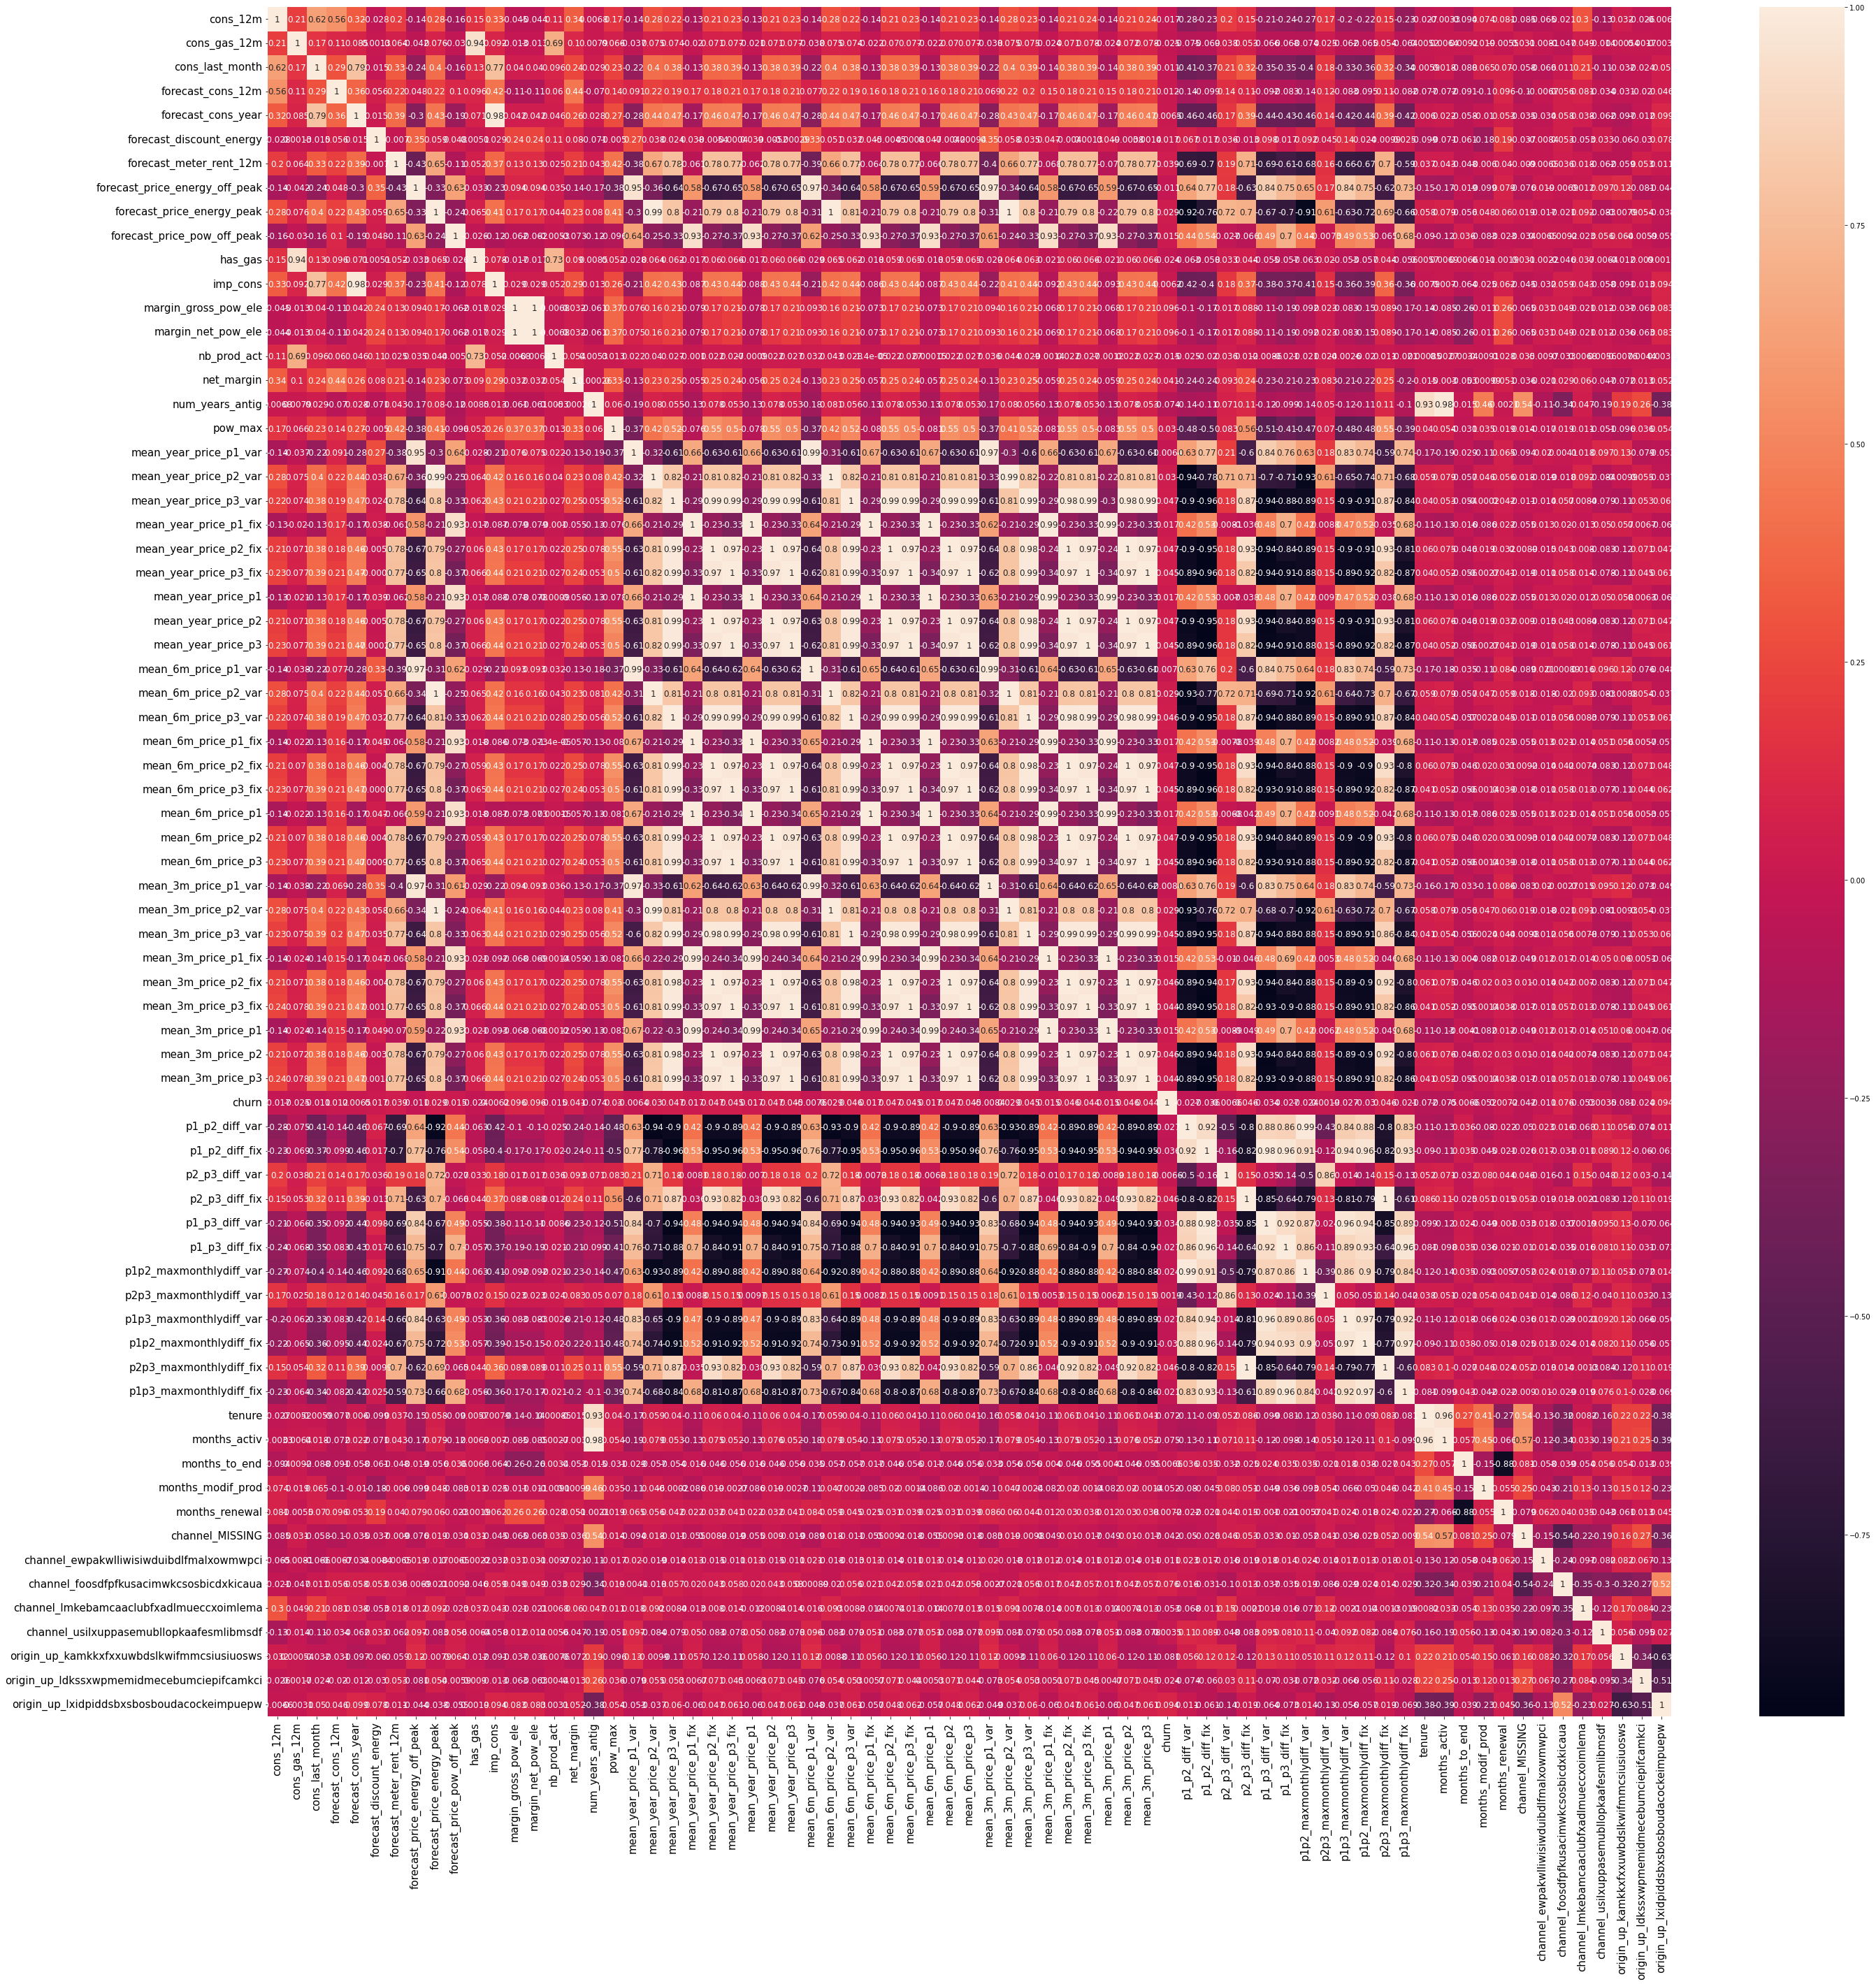

In [86]:
correlation = df.corr()

# Plot correlation
plt.figure(figsize=(45, 45))
sns.heatmap(
    correlation, 
    xticklabels=correlation.columns.values,
    yticklabels=correlation.columns.values, 
    annot=True, 
    annot_kws={'size': 12}
)
# Axis ticks size
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [87]:
remove = ['forecast_cons_year', 'margin_net_pow_ele', 'num_years_antig', 'tenure']
df = df.drop(columns = remove)

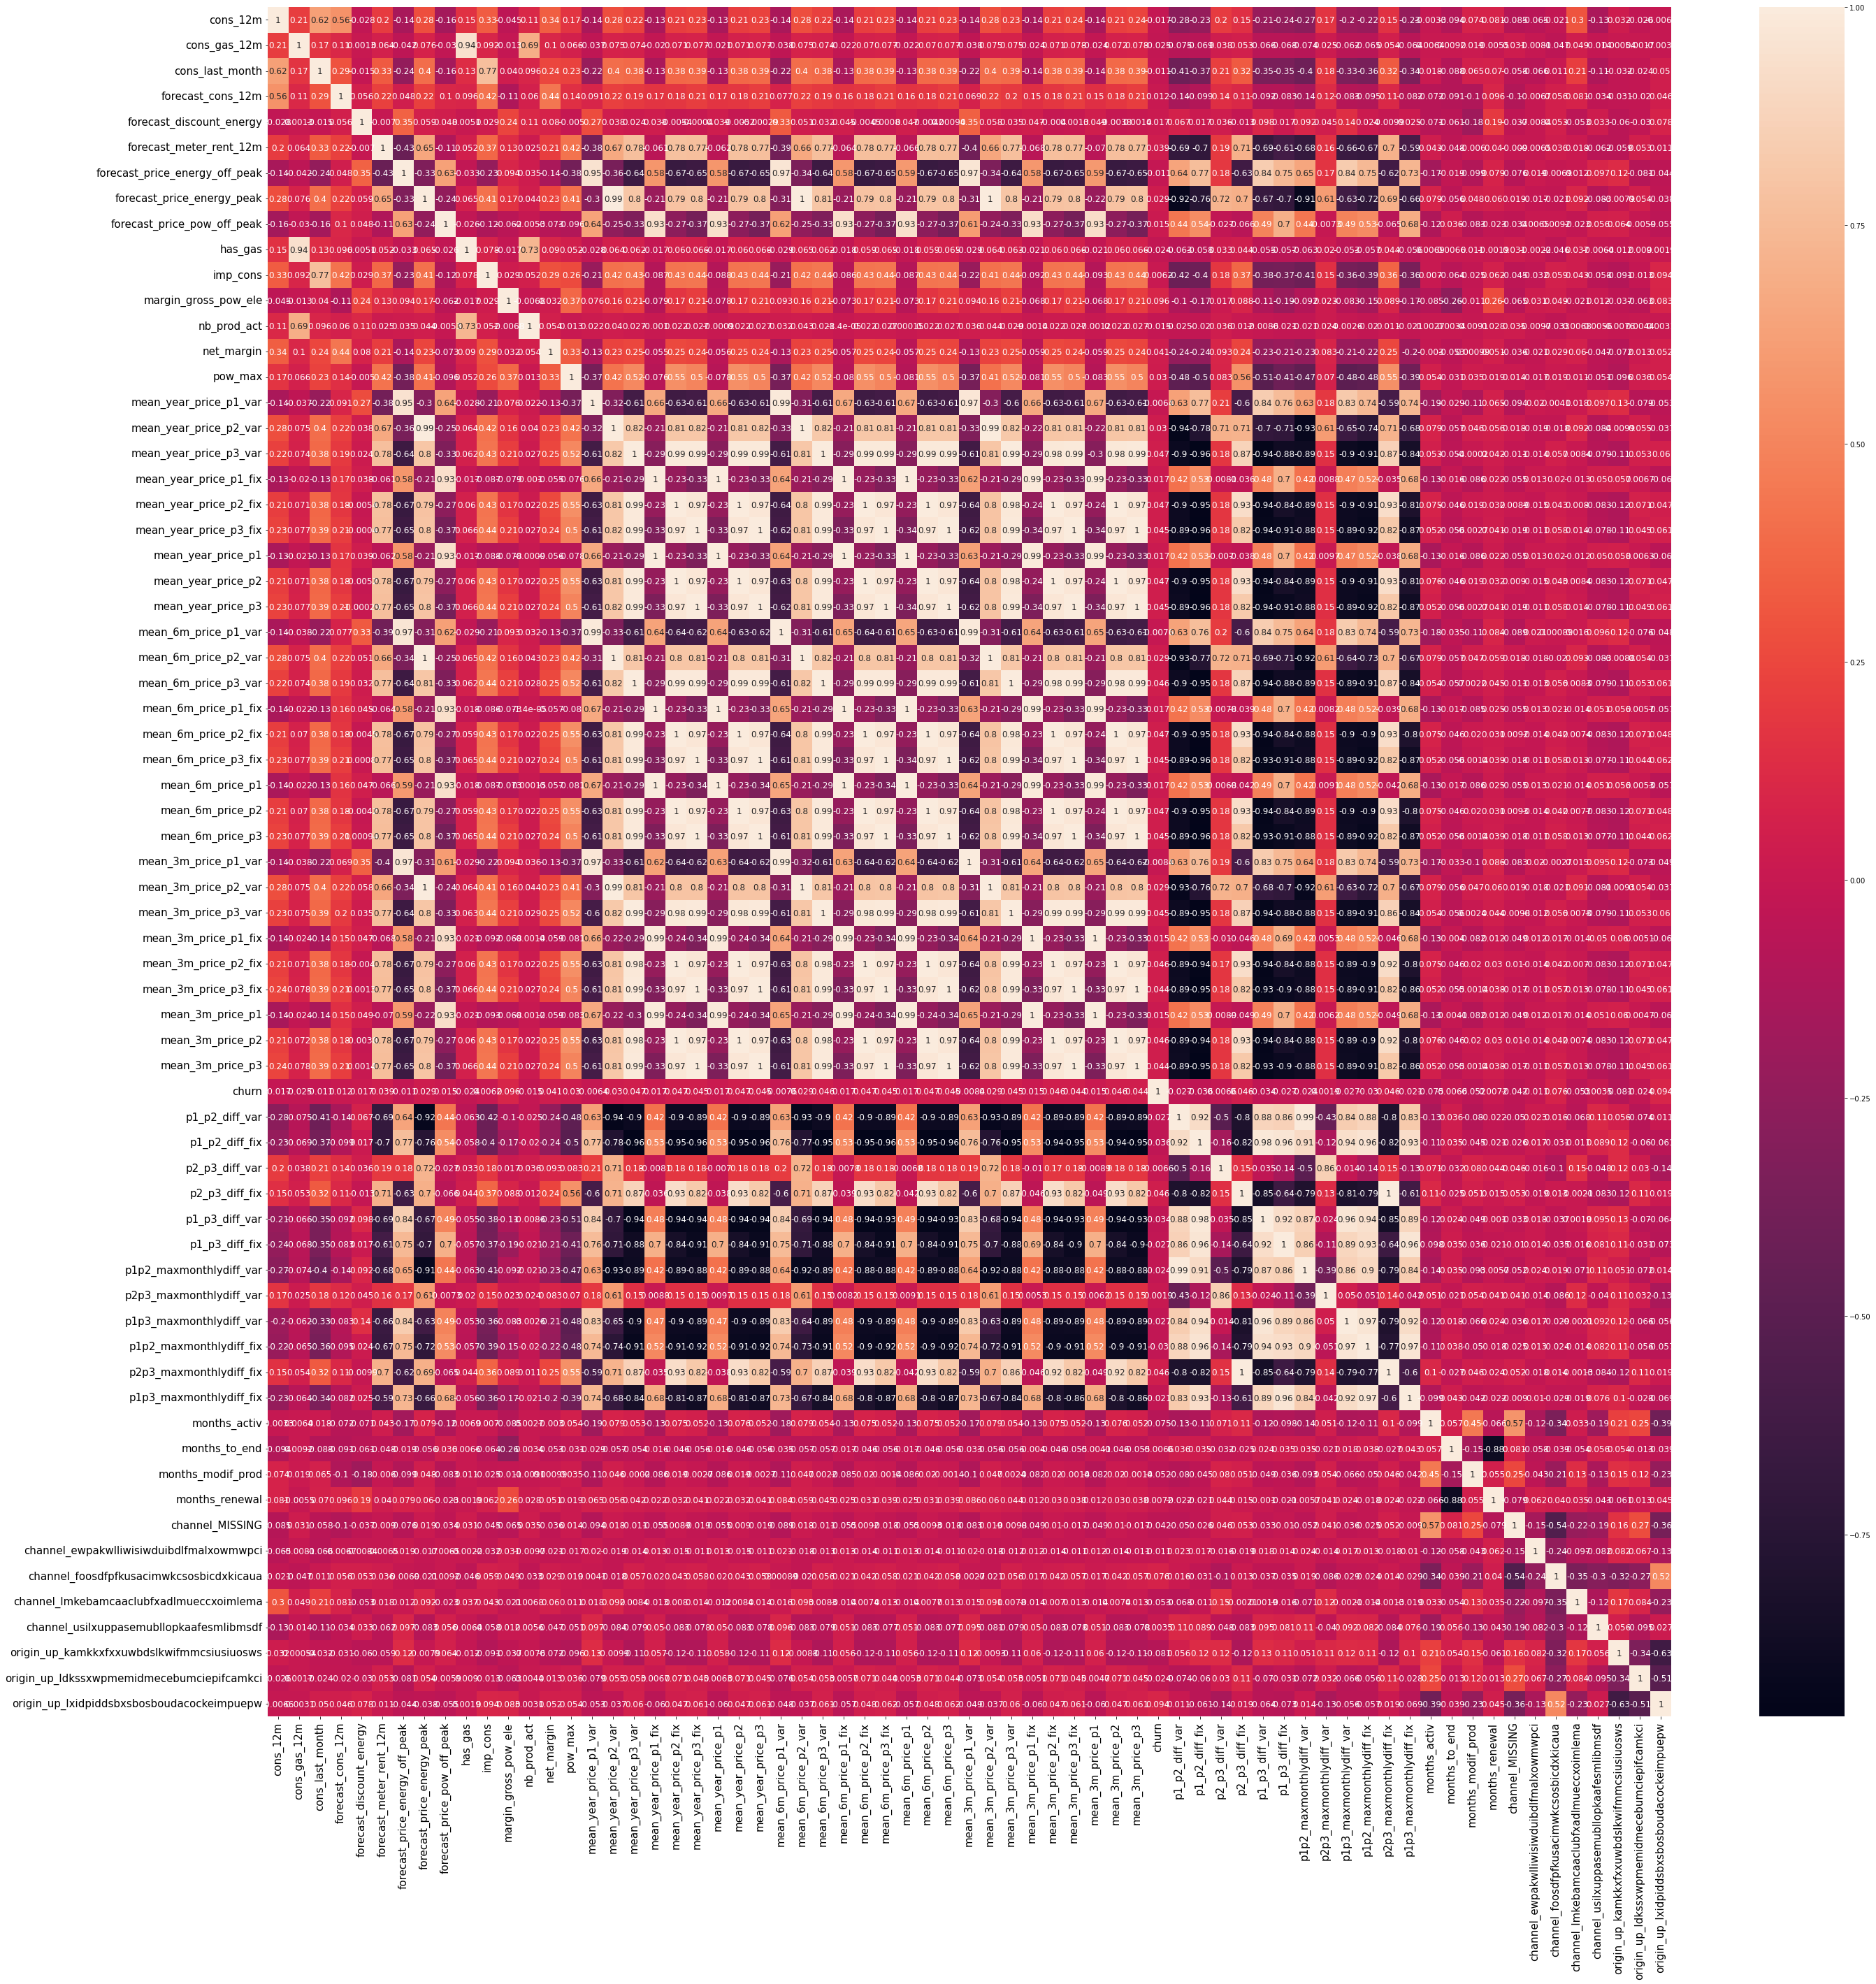

In [88]:
#check correlation again
corr2 = df.corr()

# Plot correlation
plt.figure(figsize=(45, 45))
sns.heatmap(
    corr2, 
    xticklabels=corr2.columns.values,
    yticklabels=corr2.columns.values, 
    annot=True, 
    annot_kws={'size': 12}
)
# Axis ticks size
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

# 4.Modelling

In [89]:
from sklearn import metrics

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, accuracy_score
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve

In [90]:
#check balance 
df['churn'].value_counts()

0    13186
1     1419
Name: churn, dtype: int64

In [91]:
df.head()

id  cons_12m  cons_gas_12m  cons_last_month  \
0  24011ae4ebbe3035111d65fa7c15bc57  0.000000      4.739944         0.000000   
1  d29c2c54acc38ff3c0614d0a653813dd  3.668479      0.000000         0.000000   
2  764c75f661154dac3a6c254cd082ea7d  2.736397      0.000000         0.000000   
3  bba03439a292a1e166f80264c16191cb  3.200029      0.000000         0.000000   
4  149d57cf92fc41cf94415803a877cb4b  3.646011      0.000000         2.721811   

   forecast_cons_12m  forecast_discount_energy  forecast_meter_rent_12m  \
0           0.000000                       0.0                 0.444045   
1           2.280920                       0.0                 1.237292   
2           1.689841                       0.0                 1.599009   
3           2.382089                       0.0                 1.318689   
4           2.650065                       0.0                 2.122969   

   forecast_price_energy_off_peak  forecast_price_energy_peak  \
0                        0.114481                    0.098142   
1                        0.145711                    0.000000   
2                        0.165794                    0.087899   
3                        0.146694                    0.000000   
4                        0.116900                    0.100015   

   forecast_price_pow_off_peak  has_gas  imp_cons  margin_gross_pow_ele  \
0                    40.606701        1   0.00000                 25.44   
1                    44.311378        0   0.00000                 16.38   
2                    44.311378        0   0.00000                 28.60   
3                    44.311378        0   0.00000                 30.22   
4                    40.606701        0   1.72689                 44.91   

   nb_prod_act  net_margin  pow_max  mean_year_price_p1_var  \
0            2      678.99   43.648                0.124787   
1            1       18.89   13.800                0.149609   
2            1        6.60   13.856                0.170512   
3            1       25.46   13.200                0.151210   
4            1       47.98   19.800                0.124174   

   mean_year_price_p2_var  mean_year_price_p3_var  mean_year_price_p1_fix  \
0                0.100749                0.066530               40.942265   
1                0.007124                0.000000               44.311375   
2                0.088421                0.000000               44.385450   
3                0.000000                0.000000               44.400265   
4                0.103638                0.072865               40.688156   

   mean_year_price_p2_fix  mean_year_price_p3_fix  mean_year_price_p1  \
0               22.352010               14.901340           41.067053   
1                0.000000                0.000000           44.460984   
2                0.000000                0.000000           44.555962   
3                0.000000                0.000000           44.551475   
4               24.412893               16.275263           40.812330   

   mean_year_price_p2  mean_year_price_p3  mean_6m_price_p1_var  \
0           22.452760           14.967871              0.123598   
1            0.007124            0.000000              0.147851   
2            0.088421            0.000000              0.168569   
3            0.000000            0.000000              0.149330   
4           24.516531           16.348129              0.121266   

   mean_6m_price_p2_var  mean_6m_price_p3_var  mean_6m_price_p1_fix  \
0              0.098104              0.061525             41.318559   
1              0.014247              0.000000             44.355820   
2              0.088535              0.000000             44.444710   
3              0.000000              0.000000             44.444710   
4              0.102368              0.073728             40.728885   

   mean_6m_price_p2_fix  mean_6m_price_p3_fix  mean_6m_price_p1  \
0             20.364442             13.576296         41.442157   
1             

In [92]:
train = df.drop(columns = ['id', 'churn'])
test = df['churn']                

In [93]:
Xtrain, Xtest, ytrain, ytest = train_test_split(train, test, test_size=0.3, random_state=157)

Xtrain.shape, Xtest.shape

((10223, 66), (4382, 66))

In [94]:
model = RandomForestClassifier(n_estimators=1000)
model.fit(Xtrain, ytrain)

RandomForestClassifier(n_estimators=1000)

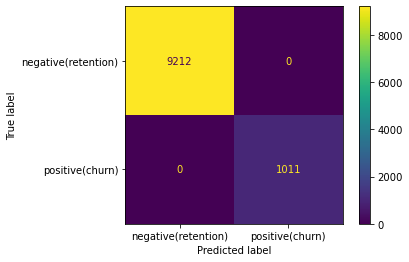

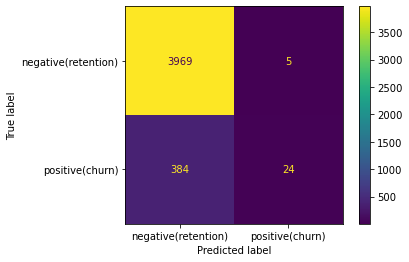

In [95]:
pred_train = model.predict(Xtrain)
pred_test = model.predict(Xtest)

cm_train = confusion_matrix(ytrain, pred_train)
cm_display_train = ConfusionMatrixDisplay(confusion_matrix = cm_train, 
                                          display_labels = ['negative(retention)','positive(churn)'])
cm_display_train.plot()

cm_test = confusion_matrix(ytest, pred_test)
cm_display_test = ConfusionMatrixDisplay(confusion_matrix = cm_test, 
                                         display_labels = ['negative(retention)','positive(churn)'])
cm_display_test.plot()

In [41]:
print('Train acc:', accuracy_score(ytrain, pred_train))
print('Test acc:', accuracy_score(ytest, pred_test))

Train acc: 1.0
Test acc: 0.910999543587403


In [42]:
#f1
print('Train F1-Score:', f1_score(ytrain, pred_train))
print('Test F1-Score:', f1_score(ytest, pred_test))

Train F1-Score: 1.0
Test F1-Score: 0.1095890410958904


In [43]:
#in all predicted churn, how many will real churn
print(f"Precision: {precision_score(ytest, pred_test)}")

#for all clients who want to leave, how many canbe predicted
print(f"Recall: {recall_score(ytest, pred_test)}")

Precision: 0.8
Recall: 0.058823529411764705


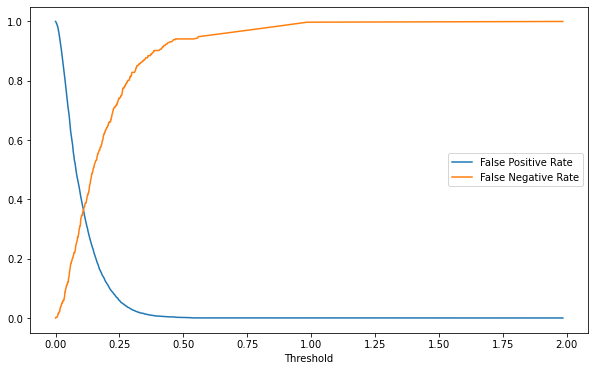

In [44]:
#agjusting threshold

predtst=model.predict_proba(Xtest)[:,1]
fpr, tpr, thresholds = roc_curve(ytest, predtst)
dfplot=pd.DataFrame({'Threshold':thresholds, 
        'False Positive Rate':fpr, 
        'False Negative Rate': 1.-tpr})
ax=dfplot.plot(x='Threshold', y=['False Positive Rate',
        'False Negative Rate'], figsize=(10,6))
#ax.plot([0.113,0.113],[0,1]) #mark example thresh.
#ax.set_xbound(0,0.0008); ax.set_ybound(0,0.3) #zoom in

<function matplotlib.pyplot.show(close=None, block=None)>

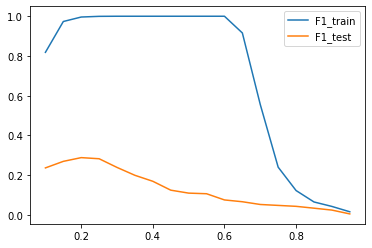

In [45]:
#based on f1 score
threshold_list = np.arange(0.1, 1, 0.05)

f1_train = []
f1_test = []

for threshold in threshold_list:   
    pred_train = model.predict_proba(Xtrain)[:,1] >= threshold
    pred_test = model.predict_proba(Xtest)[:,1] >= threshold
    
    f1_train.append(f1_score(ytrain, pred_train))
    f1_test.append(f1_score(ytest, pred_test))


plt.plot(threshold_list, f1_train, label = 'F1_train')
plt.plot(threshold_list, f1_test, label = 'F1_test')
plt.legend()
plt.show

Test F1-Score: 0.07981220657276995
Precision: 0.9444444444444444
Recall: 0.041666666666666664


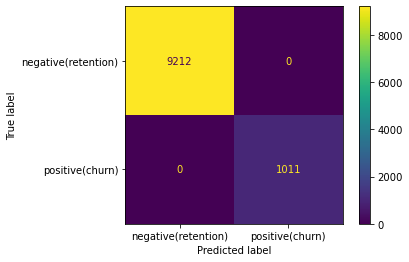

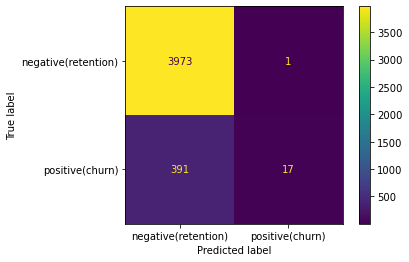

In [96]:
#for parobability prediction
pred_train_prob = model.predict_proba(Xtrain)[:,1] >= 0.6
pred_test_prob = model.predict_proba(Xtest)[:,1] >=0.6

cm_train = confusion_matrix(ytrain, pred_train_prob)
cm_display_train = ConfusionMatrixDisplay(confusion_matrix = cm_train, 
                                          display_labels = ['negative(retention)','positive(churn)'])
cm_display_train.plot()

cm_test = confusion_matrix(ytest, pred_test_prob)
cm_display_test = ConfusionMatrixDisplay(confusion_matrix = cm_test, 
                                         display_labels = ['negative(retention)','positive(churn)'])
cm_display_test.plot()

print('Test F1-Score:', f1_score(ytest, pred_test_prob))
print(f"Precision: {precision_score(ytest, pred_test_prob)}")
print(f"Recall: {recall_score(ytest, pred_test_prob)}")

### Understanding Model

In [47]:
feature_importances = pd.DataFrame({
    'features': Xtrain.columns,
    'importance': model.feature_importances_
}).sort_values(by='importance', ascending=True).reset_index()

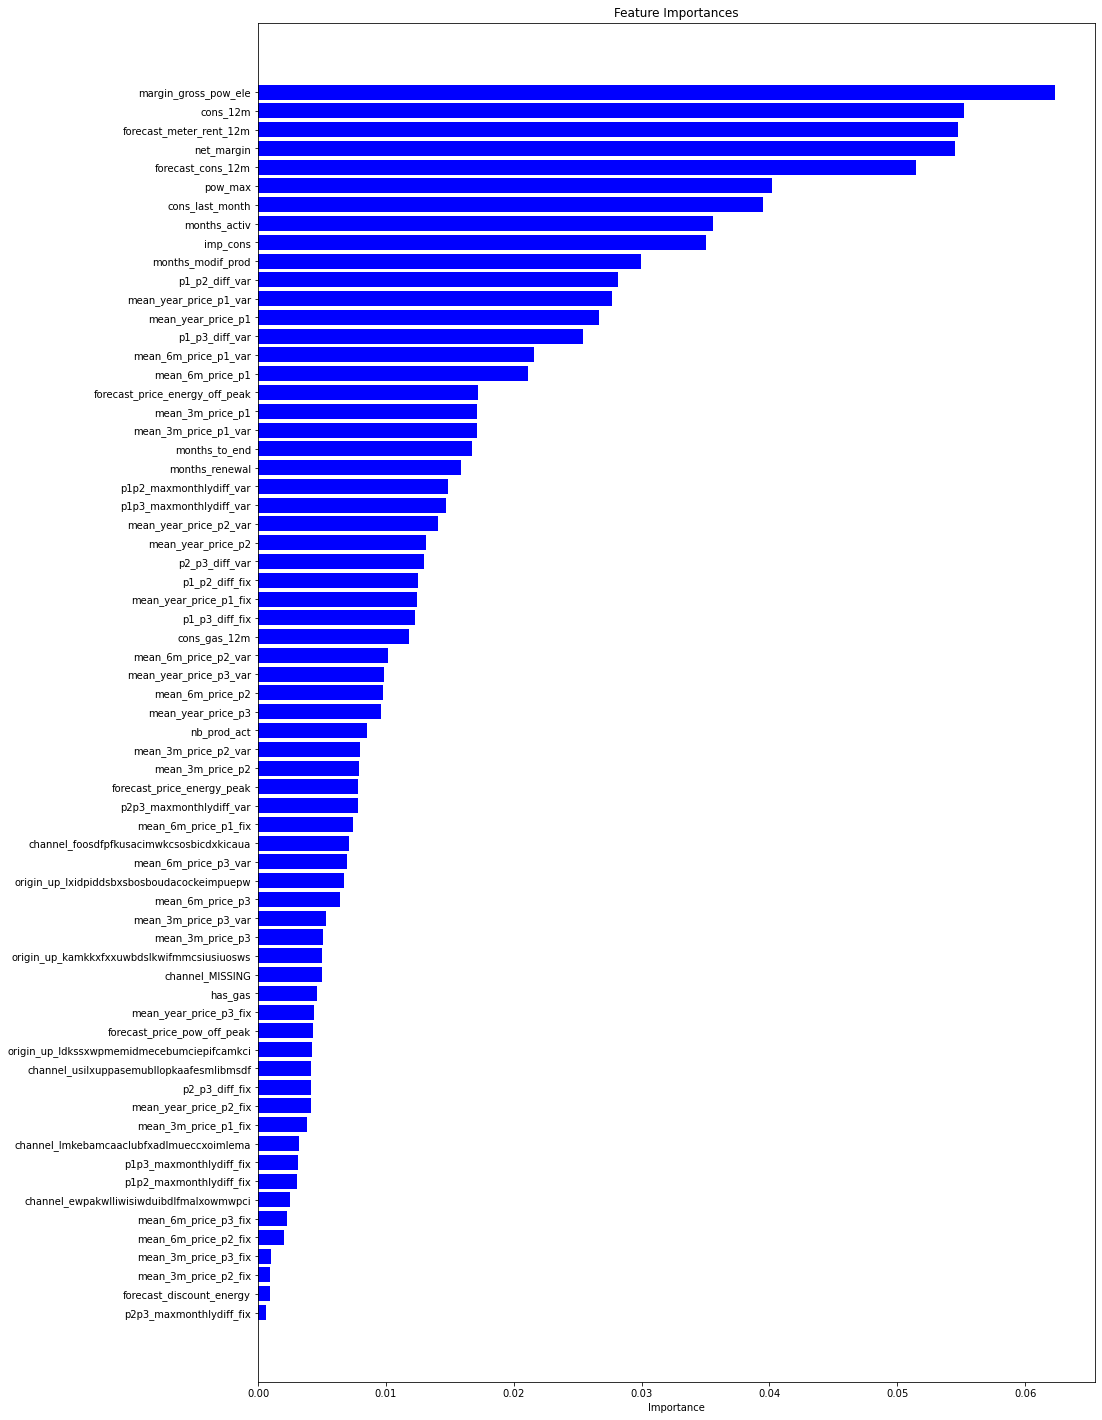

In [48]:
plt.figure(figsize=(15, 25))
plt.title('Feature Importances')
plt.barh(range(len(feature_importances)), feature_importances['importance'], color='b', align='center')
plt.yticks(range(len(feature_importances)), feature_importances['features'])
plt.xlabel('Importance')
plt.show()

In [100]:
proba_predictions = model.predict_proba(Xtest)
probabilities = proba_predictions[:, 1]

Xtest.reset_index()

Xtest['churn'] = pred_test.tolist()
Xtest['churn_probability'] = probabilities.tolist()
Xtest.to_csv('out_of_sample_data_with_predictions.csv')

/var/folders/wn/y3g3v6ns1xd13wp9v76279qc0000gn/T/ipykernel_9399/1211100893.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xtest['churn'] = pred_test.tolist()
/var/folders/wn/y3g3v6ns1xd13wp9v76279qc0000gn/T/ipykernel_9399/1211100893.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xtest['churn_probability'] = probabilities.tolist()


In [51]:
#Original 'dirty' dataset

raw = pd.read_csv('clean_data_after_eda.csv')
raw = pd.get_dummies(raw, columns=['origin_up'], prefix='origin_up')
raw = pd.get_dummies(raw, columns=['channel_sales'], prefix='channel_sales')
raw['has_gas'] = raw['has_gas'].replace(['t', 'f'], [1, 0])

raw = raw.drop(columns = ['Unnamed: 0', 'id', 'date_activ', 'date_end', 'date_modif_prod', 'date_renewal'])
raw.head()

cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
0         0         54946                0               0.00   
1      4660             0                0             189.95   
2       544             0                0              47.96   
3      1584             0                0             240.04   
4      4425             0              526             445.75   

   forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
0                   0                       0.0                     1.78   
1                   0                       0.0                    16.27   
2                   0                       0.0                    38.72   
3                   0                       0.0                    19.83   
4                 526                       0.0                   131.73   

   forecast_price_energy_off_peak  forecast_price_energy_peak  \
0                        0.114481                    0.098142   
1                        0.145711                    0.000000   
2                        0.165794                    0.087899   
3                        0.146694                    0.000000   
4                        0.116900                    0.100015   

   forecast_price_pow_off_peak  has_gas  imp_cons  margin_gross_pow_ele  \
0                    40.606701        1      0.00                 25.44   
1                    44.311378        0      0.00                 16.38   
2                    44.311378        0      0.00                 28.60   
3                    44.311378        0      0.00                 30.22   
4                    40.606701        0     52.32                 44.91   

   margin_net_pow_ele  nb_prod_act  net_margin  num_years_antig  pow_max  \
0               25.44            2      678.99                3   43.648   
1               16.38            1       18.89                6   13.800   
2               28.60            1        6.60                6   13.856   
3               30.22            1       25.46                6   13.200   
4               44.91            1       47.98                6   19.800   

   mean_year_price_p1_var  mean_year_price_p2_var  mean_year_price_p3_var  \
0                0.124787                0.100749                0.066530   
1                0.149609                0.007124                0.000000   
2                0.170512                0.088421                0.000000   
3                0.151210                0.000000                0.000000   
4                0.124174                0.103638                0.072865   

   mean_year_price_p1_fix  mean_year_price_p2_fix  mean_year_price_p3_fix  \
0               40.942265               22.352010               14.901340   
1               44.311375                0.000000                0.000000   
2               44.385450                0.000000                0.000000   
3               44.400265                0.000000                0.000000   
4               40.688156               24.412893               16.275263   

   mean_year_price_p1  mean_year_price_p2  mean_year_price_p3  \
0           41.067053           22.452760           14.967871   
1           44.460984            0.007124            0.000000   
2           44.555962            0.088421            0.000000   
3           44.551475            0.000000            0.000000   
4           40.812330           24.516531           16.348129   

   mean_6m_price_p1_var  mean_6m_price_p2_var  mean_6m_price_p3_var  \
0              0.123598              0.098104              0.061525   
1              0.147851              0.014247              0.000000   
2              0.168569              0.088535              0.000000   
3              0.149330              0.000000              0.000000   
4              0.121266              0.102368              0.073728   

   mean_6m_price_p1_fix  mean_6m_price_p2_fix  mean_6m_price_p3_fix  \
0             41.318559             20.36

In [52]:
raw_train = raw.drop(columns = ['churn'])
raw_test = raw['churn']  

In [53]:
Xtrain, Xtest, ytrain, ytest = train_test_split(raw_train, raw_test, test_size=0.3, random_state=157)

Xtrain.shape, Xtest.shape

((10223, 59), (4382, 59))

In [54]:
model = RandomForestClassifier(n_estimators=1000)
model.fit(Xtrain, ytrain)

RandomForestClassifier(n_estimators=1000)

Test F1-Score: 0.10526315789473685
Precision: 0.7931034482758621
Recall: 0.056372549019607844


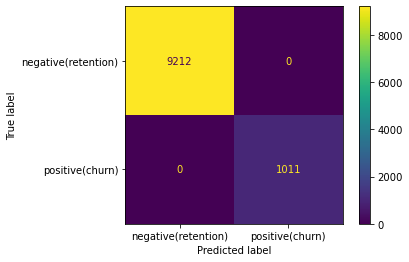

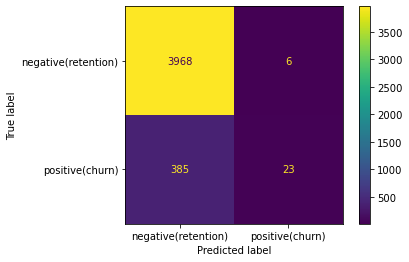

In [55]:
pred_train = model.predict(Xtrain)
pred_test = model.predict(Xtest)

cm_train = confusion_matrix(ytrain, pred_train)
cm_display_train = ConfusionMatrixDisplay(confusion_matrix = cm_train, 
                                          display_labels = ['negative(retention)','positive(churn)'])
cm_display_train.plot()

cm_test = confusion_matrix(ytest, pred_test)
cm_display_test = ConfusionMatrixDisplay(confusion_matrix = cm_test, 
                                         display_labels = ['negative(retention)','positive(churn)'])
cm_display_test.plot()

print('Test F1-Score:', f1_score(ytest, pred_test))
print(f"Precision: {precision_score(ytest, pred_test)}")
print(f"Recall: {recall_score(ytest, pred_test)}")